In [42]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import pandas as pd
from matplotlib import cm
import plotly.express as px
import statsmodels.datasets
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [45]:
mtcars = statsmodels.datasets.get_rdataset('mtcars').data

<Figure size 1080x576 with 0 Axes>

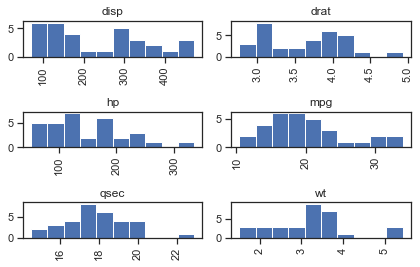

In [52]:
data = mtcars[['disp', 'drat', 'hp', 'mpg', 'qsec', 'wt']].copy()
plt.figure(figsize=(15,8))
data.melt().hist(by='variable', column='value')
plt.tight_layout()
plt.show()

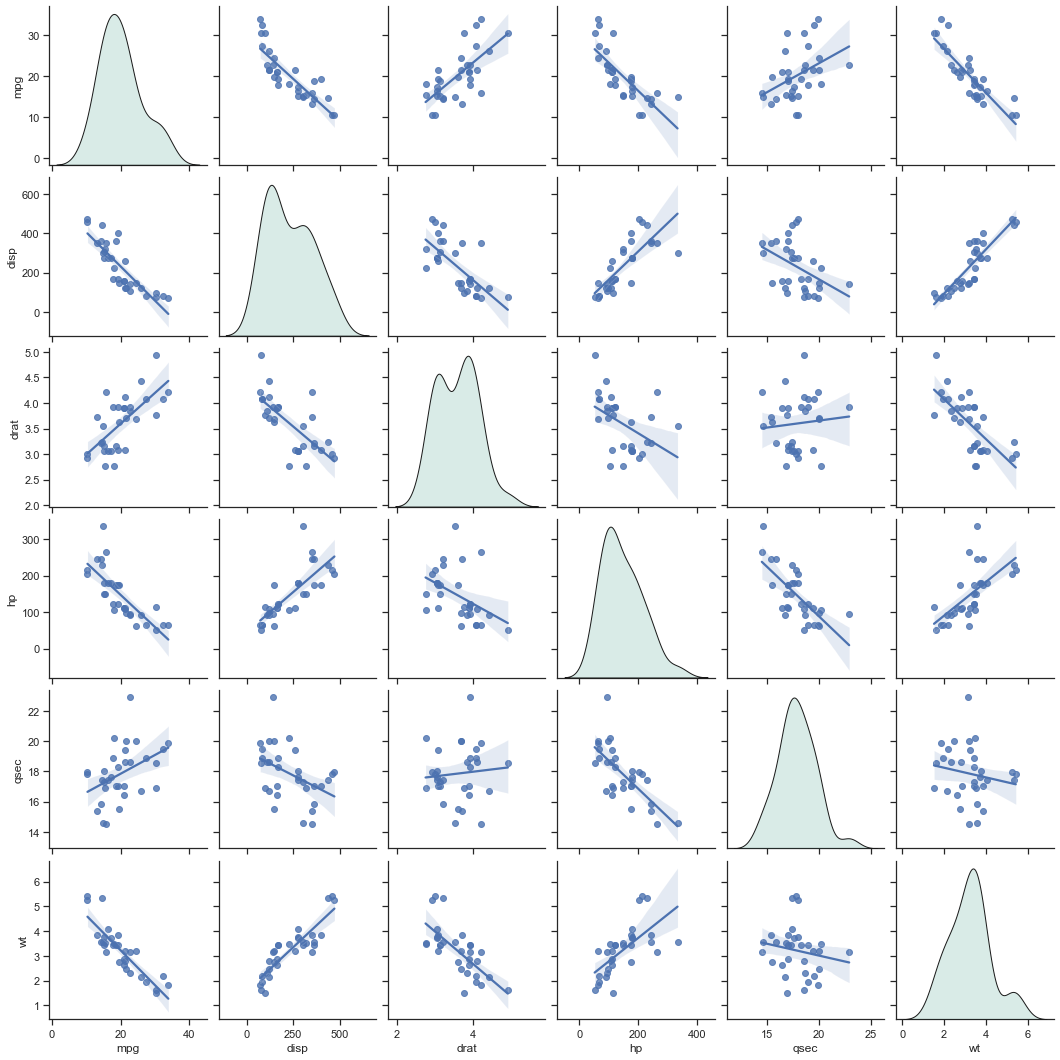

In [27]:
sns.pairplot(data[['mpg', 'disp', 'drat', 'hp', 'qsec', 'wt']], 
             diag_kind='kde', kind = 'reg', 
             diag_kws={'color': '#69b3a2', 'edgecolor': 'k'})

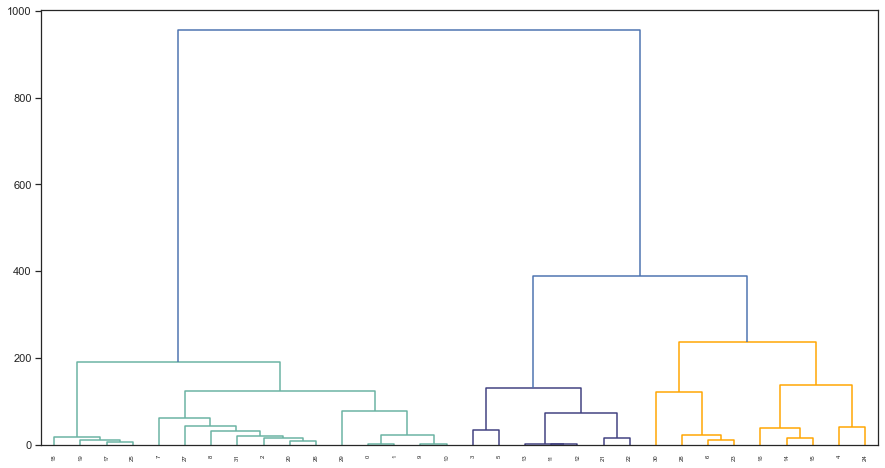

In [32]:
Z = linkage(data, method='ward')

plt.figure(figsize=(15,8))
dendrogram(Z, 
           leaf_rotation=90, 
           leaf_font_size=6,
           color_threshold=350)

set_link_color_palette(['#69b3a2', '#404080', 'orange'])
plt.axvline(x=350, linestyle='--')
plt.show()

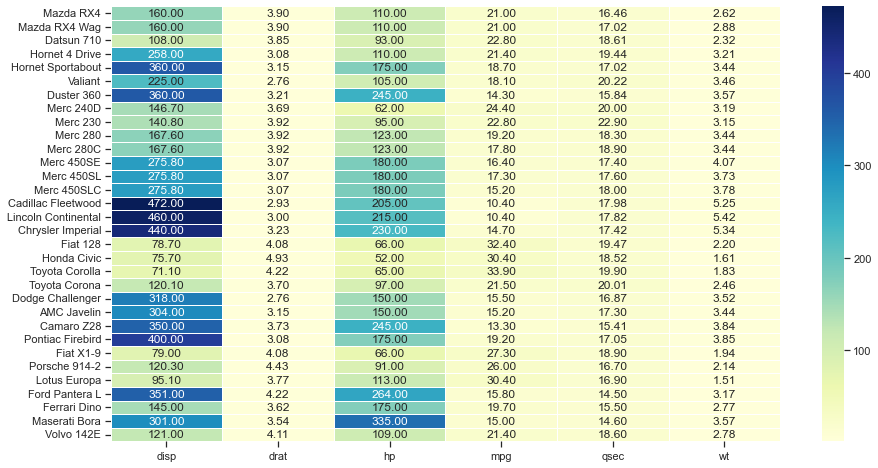

In [35]:
plt.figure(figsize=(15,8))

sns.heatmap(data, 
            cmap='YlGnBu', 
            cbar=True, 
            annot=True, 
            fmt='.2f', 
            linewidths=0.5)

plt.show()

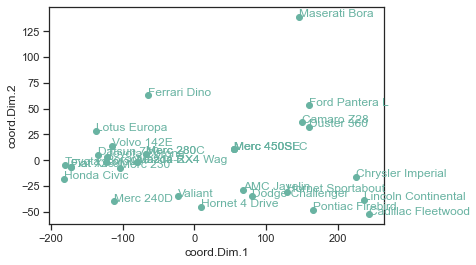

In [49]:
# scaler = StandardScaler()
# for i in data.columns :
#     data[i] = scaler.fit_transform(data[i])
#data = scaler.fit_transform(data)
pca = PCA(n_components=2)
pca.fit(data)

df = pd.DataFrame(pca.transform(data), columns=["coord.Dim.1", "coord.Dim.2"])
df['name'] = data.index

# Plot the PCA results
plt.scatter(df['coord.Dim.1'], df['coord.Dim.2'], c="#69b3a2")
for i, txt in enumerate(df["name"]):
    plt.annotate(txt, (df['coord.Dim.1'][i], df['coord.Dim.2'][i]), color='#69b3a2')
plt.xlabel('coord.Dim.1')
plt.ylabel('coord.Dim.2')
plt.show()